In [1]:
import networkx as nx
import random
from pyvis.network import Network
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def edge(node1, node2):
    if node1!=node2:
        graph.add_edge(node1, node2)
        return 'done'

In [3]:
def destroy(graph, fisrt=False):
    if nx.is_empty(graph):
        return
    #print('diameter: ' + str(nx.diameter(graph)))
    critical_nodes = []
    for node in graph.nodes(data='weight'):
        if node[1] >= 10:
            critical_nodes.append(node[0])
    neighbours = [[] for i in range(len(critical_nodes))]
    for edge in graph.edges():
        for i in range(len(critical_nodes)):
            if critical_nodes[i] == edge[0]:
                neighbours[i].append(edge[1])
            if critical_nodes[i] == edge[1]:
                neighbours[i].append(edge[0])
    for node in critical_nodes:
        graph.remove_node(node)
        for i in range(len(neighbours)):
            try:
                neighbours[i].remove(node)
            except:
                pass
    for i in range(len(neighbours)):
        try:
            increment = 10/len(neighbours[i])
        except ZeroDivisionError:
            pass
        for node in neighbours[i]:
            graph.nodes[node]['weight'] += increment
    nodes = list(graph.nodes(data="weight"))
    for node in nodes:
        if node[1] >= 10:
            destroy(graph)

In [4]:
graph = nx.Graph()
n_nodes = 100
for i in range(n_nodes):
        graph.add_node(i, weight=random.randint(0, 7))
n_edges = 300
for j in range(n_edges):
        while not edge(random.randint(0, n_nodes-1), random.randint(0, n_nodes-1)):
            d = 'done'
nt = Network(height='750px',
                  width='100%',
                  bgcolor='#222222',
                  font_color='white',
                  notebook=True)
nt.from_nx(graph)
nt.barnes_hut()
nt.show('nx.html')

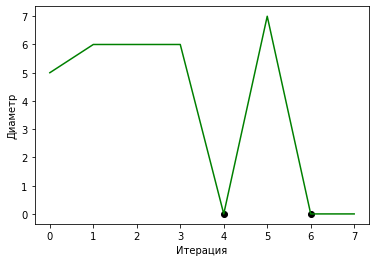

In [5]:
critical_nodes = [random.randint(0,n_nodes-1) for i in range(10)]
for node in critical_nodes:
    graph.nodes[node]['weight'] = 10
counter = 0
destroys = []
if nx.is_connected(graph):
    diameters = [nx.diameter(graph)]
else:
    diameters = [0]
while len(graph) > 1:
    if nx.is_connected(graph):
        critical_nodes = []
        for node in graph.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(graph) - 1)
            graph.nodes[list(graph.nodes)[rand]]['weight'] = 10
        destroy(graph)
    else:
        S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]
        graph = max(S, key=len)
        critical_nodes = []
        for node in graph.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(graph) - 1)
            graph.nodes[list(graph.nodes)[rand]]['weight'] = 10
        destroy(graph)
        destroys.append(counter)
    counter += 1
    try:
        diameters.append(nx.diameter(graph))
    except:
        diameters.append(0)
counters = [i for i in range(counter+1)]
x = [0 for i in range(len(destroys))]
plt.plot(counters, diameters, color='green')
plt.xlabel("Итерация")
plt.ylabel("Диаметр")
plt.scatter(destroys, x, color='black')